In [9]:
import time
import os

import numpy as np
from diffrax import diffeqsolve, ODETerm, Dopri5, SaveAt, Kvaerno5, Kvaerno4, PIDController
import jax.numpy as jnp
import jax


import matplotlib.pyplot as plt

from rosenbrock import Rosenbrock23


mu = 100.
t0, t1 = 0., 10*mu
y0 = jnp.array([2., 0.])

def f(t, y, args):
    return jnp.array([y[1], mu*(1-y[0]**2)*y[1]-y[0]])



N = 100

stepsize_controller = PIDController(rtol=1e-4, atol=1e-4)
term = ODETerm(f)
kvaerno5 = Kvaerno5()
kvaerno4 = Kvaerno4()
rosenbrock32 = Rosenbrock23()
T_end = t1
stepsize = T_end/N
saveat = SaveAt(ts=list(np.arange(0, T_end, stepsize)))


In [10]:
jax.jacfwd(lambda y: term.vf(t=0, y=y, args=None))(y0)

Array([[   0.,    1.],
       [  -1., -300.]], dtype=float32)

In [11]:
control = term.contr(t0, t1)
type(control)

float

In [12]:
start = time.time()
sol_kvaerno5 = diffeqsolve(term, kvaerno5, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=10000)
end = time.time()
print("Kvaerno5 time: ", end-start)

start = time.time()
sol_kvaerno4 = diffeqsolve(term, kvaerno4, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=10000)
end = time.time()
print("Kvaerno4 time: ", end-start)

start = time.time()
sol_rosenbrock23 = diffeqsolve(term, rosenbrock32, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=10000)
end = time.time()
print("Rosenbrock23 time: ", end-start)


Kvaerno5 time:  2.090841770172119
Kvaerno4 time:  1.8073875904083252
Rosenbrock23 time:  0.6501529216766357


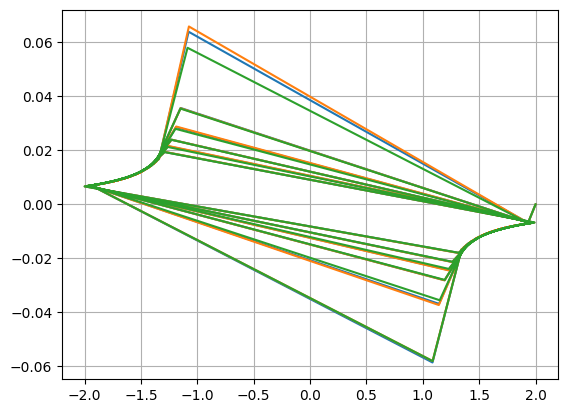

In [13]:
plt.plot(sol_kvaerno4.ys[:,0], sol_kvaerno4.ys[:,1])
plt.plot(sol_kvaerno5.ys[:,0], sol_kvaerno5.ys[:,1])
plt.plot(sol_rosenbrock23.ys[:,0], sol_rosenbrock23.ys[:,1])

plt.grid()